In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #advanced visualization library
import requests, zipfile, io
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
chicago=pd.read_csv("/content/drive/My Drive/chicago.csv")

In [9]:
chicago.REGION.unique()

array(['Downtown Lakefront', 'Rogers Park - West Ridge',
       'Irving Park-Avondale-North Ctr', 'Chicago Loop'], dtype=object)

In [0]:
l=['REGION','TIME','SPEED']
df=chicago[l]

we chose to work on the 'chicago loop location

In [12]:
df1=df[df.REGION=="Chicago Loop"]
df1.head()

,REGION,TIME,SPEED
3,Chicago Loop,05/23/2018 11:50:44 AM,15.00
10,Chicago Loop,03/14/2018 03:31:31 PM,13.64
15,Chicago Loop,03/13/2018 09:40:38 AM,12.95
17,Chicago Loop,03/13/2018 09:50:55 AM,14.32
21,Chicago Loop,03/13/2018 06:31:33 PM,12.27


In [0]:
df1["TIME"]=pd.to_datetime(df1["TIME"], format="%m/%d/%Y %H:%M:%S %p")

In [0]:
df1 = df1.sort_values(by="TIME")

df1=df1.drop('REGION',axis=1)

In [0]:
np.random.seed(7)

In [16]:
# split into train and test sets
train_size = int(len(df1) * 0.67)
test_size = len(df1) - train_size
train, test = df1[0:train_size], df1[train_size:len(df1)]
print(len(train), len(test))

65916 32467


In [0]:
df1.to_csv('new.csv', index=False)

Train on 44149 samples, validate on 21746 samples
Epoch 1/15
 - 1s - loss: 0.0621 - val_loss: 0.0069
Epoch 2/15
 - 0s - loss: 0.0062 - val_loss: 0.0063
Epoch 3/15
 - 0s - loss: 0.0052 - val_loss: 0.0057
Epoch 4/15
 - 0s - loss: 0.0046 - val_loss: 0.0055
Epoch 5/15
 - 0s - loss: 0.0044 - val_loss: 0.0053
Epoch 6/15
 - 0s - loss: 0.0042 - val_loss: 0.0051
Epoch 7/15
 - 0s - loss: 0.0041 - val_loss: 0.0050
Epoch 8/15
 - 0s - loss: 0.0040 - val_loss: 0.0048
Epoch 9/15
 - 0s - loss: 0.0039 - val_loss: 0.0047
Epoch 10/15
 - 0s - loss: 0.0038 - val_loss: 0.0046
Epoch 11/15
 - 0s - loss: 0.0038 - val_loss: 0.0045
Epoch 12/15
 - 0s - loss: 0.0037 - val_loss: 0.0045
Epoch 13/15
 - 0s - loss: 0.0037 - val_loss: 0.0044
Epoch 14/15
 - 0s - loss: 0.0037 - val_loss: 0.0044
Epoch 15/15
 - 0s - loss: 0.0036 - val_loss: 0.0043
Train Score: 3.81 RMSE
Test Score: 4.00 RMSE


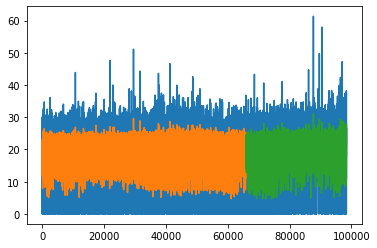

In [20]:
# LSTM for with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('new.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
a = model.fit(trainX, trainY, validation_split=0.33, epochs=15, batch_size=256, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

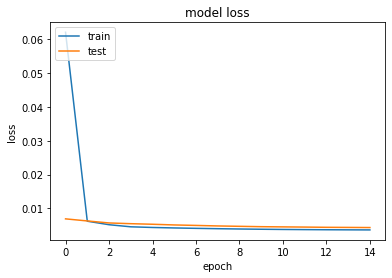

In [21]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
